<a href="https://colab.research.google.com/github/Boitymellow95/boitumelo-makgoba/blob/master/results%20of%20prediction%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from sklearn import preprocessing, svm 
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
#ignore warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv ("https://raw.githubusercontent.com/Boitymellow95/boitumelo-makgoba/master/xAPI-Edu-Data.csv") 

In [8]:
df.head() 

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [9]:
df.tail() 

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [13]:
def DescriptiveStatistics(df):
    print("No of rwos and columns information:",df.shape)
    print("")
    print("---"*20)
    print("")
    print("Columns:")
    print("")
    print(df.columns.values)
    print("---"*20)
    print("")
    print(df.info())
    print("---"*20)
    print("")
    print(df.describe()) 

In [14]:
DescriptiveStatistics(df)

No of rwos and columns information: (480, 17)

------------------------------------------------------------

Columns:

['gender' 'NationalITy' 'PlaceofBirth' 'StageID' 'GradeID' 'SectionID'
 'Topic' 'Semester' 'Relation' 'raisedhands' 'VisITedResources'
 'AnnouncementsView' 'Discussion' 'ParentAnsweringSurvey'
 'ParentschoolSatisfaction' 'StudentAbsenceDays' 'Class']
------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     

In [17]:
def CheckMissingInfo(df):
    print(df.isnull().sum())
    print("---"*20)
    print("")
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    print(missing_data)

In [19]:
CheckMissingInfo(df) 

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64
------------------------------------------------------------

Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [23]:
def GetColumnCount(df):
    int_columns = [col for col in df.columns if(df[col].dtype != "object")]
    print("No of integer type columns:",len(int_columns))
    print(int_columns)
    print("")
    obj_columns = [col for col in df.columns if(df[col].dtype == "object")]
    print("No of object type columns:",len(obj_columns))
    print(obj_columns)
    return int_columns,obj_columns

In [24]:
int_columns,obj_columns = GetColumnCount(df)

No of integer type columns: 4
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

No of object type columns: 13
['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']


In [26]:
def GetCountPlots(df,obj_columns):
    for col in obj_columns:
        if(len(df[col].value_counts()) < 5):
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(12,6))
        print(sns.countplot(x=col, data=df, palette="muted"))
        plt.show()

        

AxesSubplot(0.125,0.125;0.775x0.755)


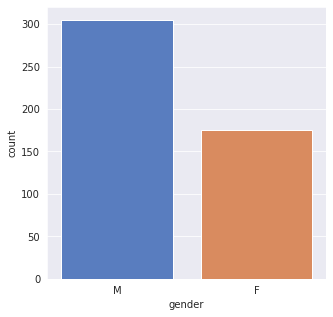

AxesSubplot(0.125,0.125;0.775x0.755)


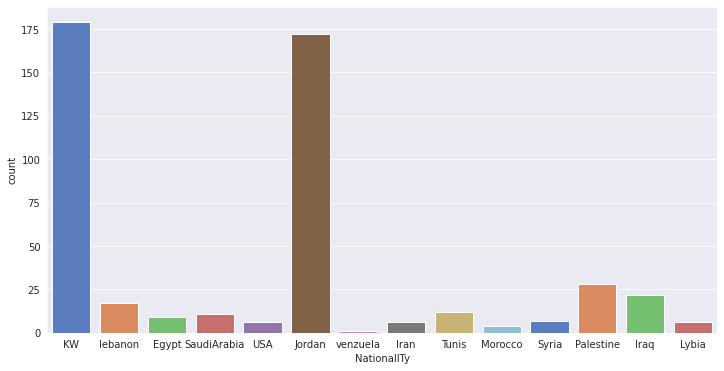

AxesSubplot(0.125,0.125;0.775x0.755)


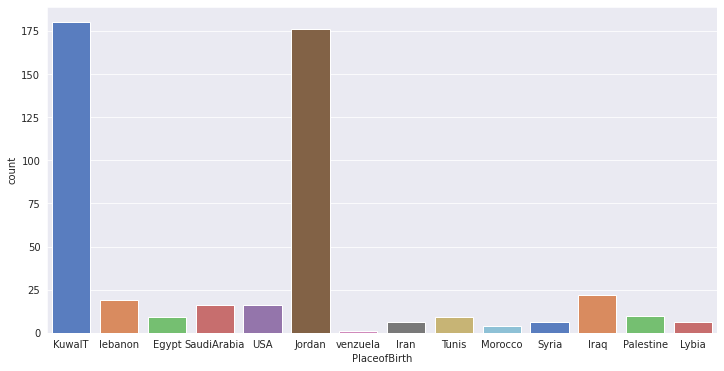

AxesSubplot(0.125,0.125;0.775x0.755)


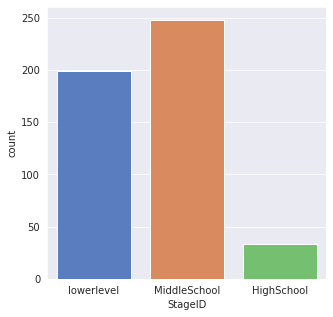

AxesSubplot(0.125,0.125;0.775x0.755)


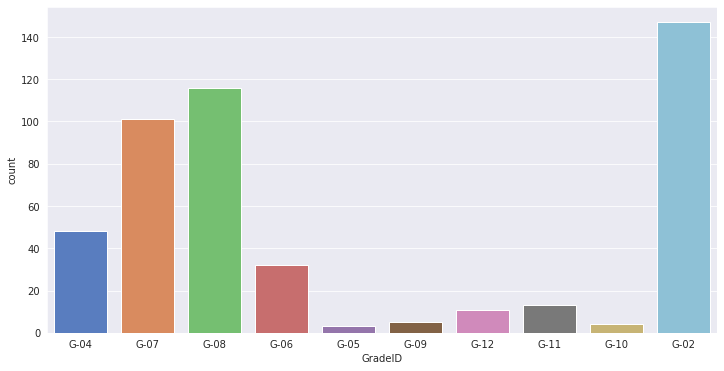

AxesSubplot(0.125,0.125;0.775x0.755)


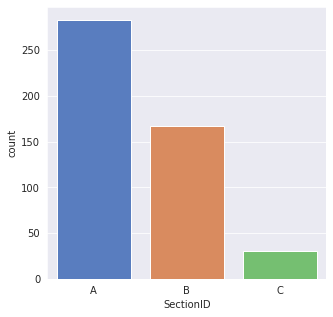

AxesSubplot(0.125,0.125;0.775x0.755)


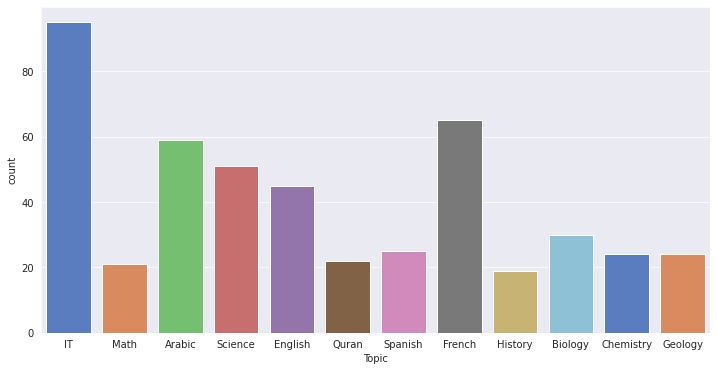

AxesSubplot(0.125,0.125;0.775x0.755)


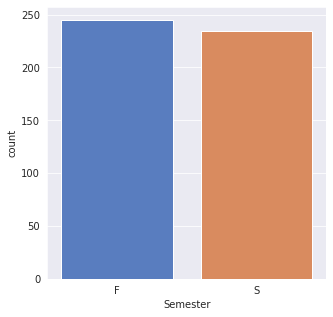

AxesSubplot(0.125,0.125;0.775x0.755)


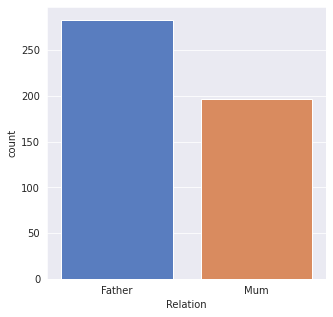

AxesSubplot(0.125,0.125;0.775x0.755)


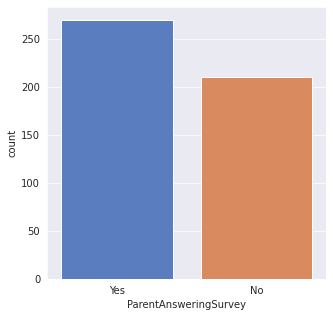

AxesSubplot(0.125,0.125;0.775x0.755)


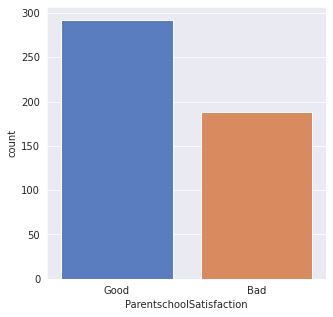

AxesSubplot(0.125,0.125;0.775x0.755)


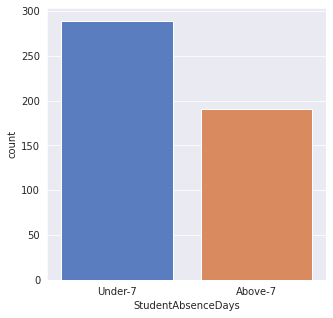

AxesSubplot(0.125,0.125;0.775x0.755)


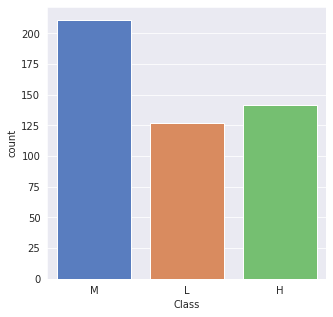

In [27]:
GetCountPlots(df,obj_columns)

In [29]:
def GetCardinality(df,obj_columns):
    for col in obj_columns:
        print("{0} :: {1}".format(col,len(df[col].value_counts())))
        
        print(df[col].value_counts())
        print("")

In [30]:
GetCardinality(df,obj_columns)

gender :: 2
M    305
F    175
Name: gender, dtype: int64

NationalITy :: 14
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
Lybia            6
USA              6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

PlaceofBirth :: 14
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

StageID :: 3
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

GradeID :: 10
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

SectionID :: 3
A    283
B    167
C     30

In [31]:
pd.crosstab(df['Class'],df['Topic'])


Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


In [33]:
def GetCountPlots_with_hue(df,obj_columns,col_hue):
    for col in obj_columns:
        if(len(df[col].value_counts()) < 5):
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(12,6))
        #print(sns.countplot(x=col, data=df, palette="muted"))
        sns.countplot(x=col,data = df, hue=col_hue,palette='bright')
        plt.show()

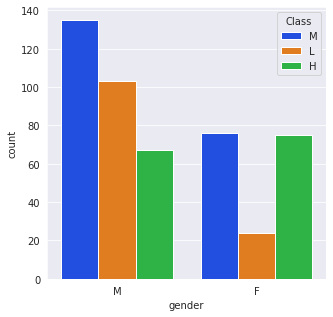

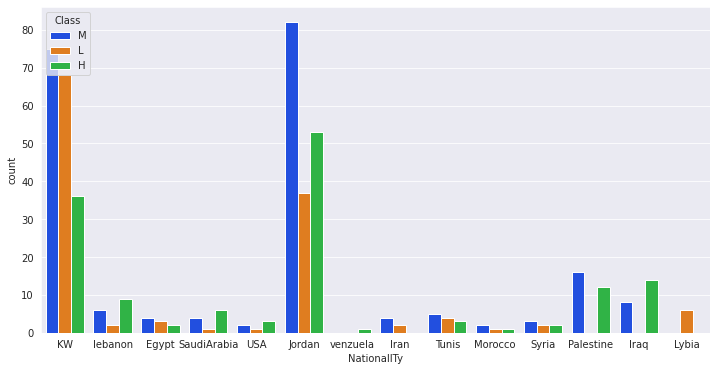

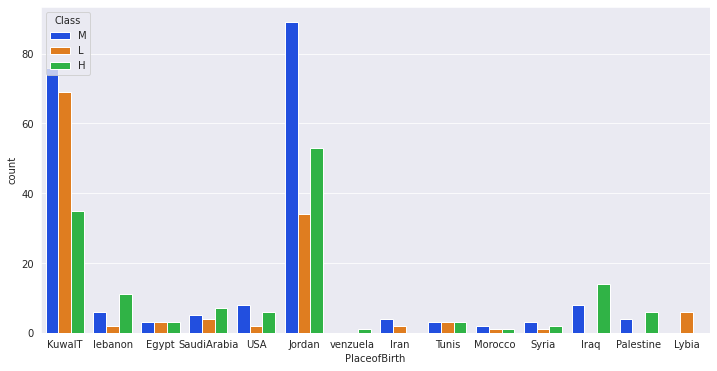

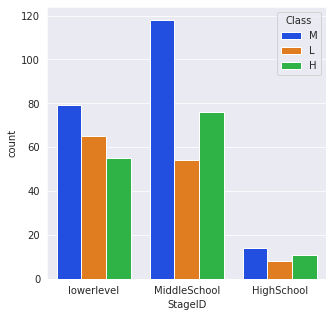

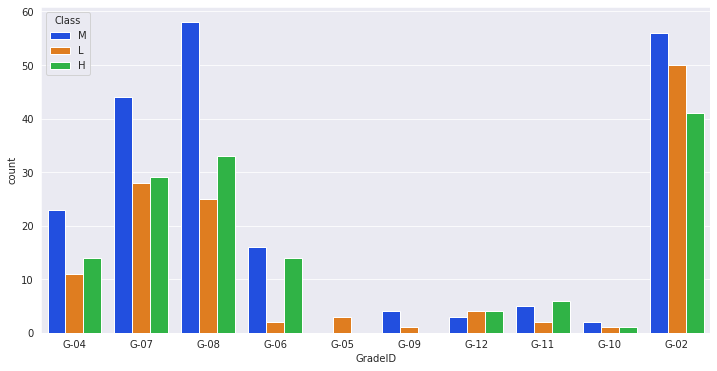

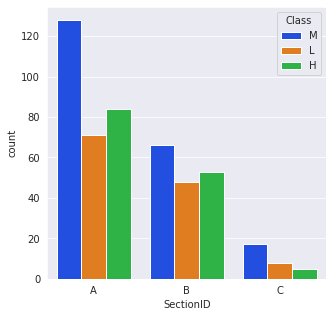

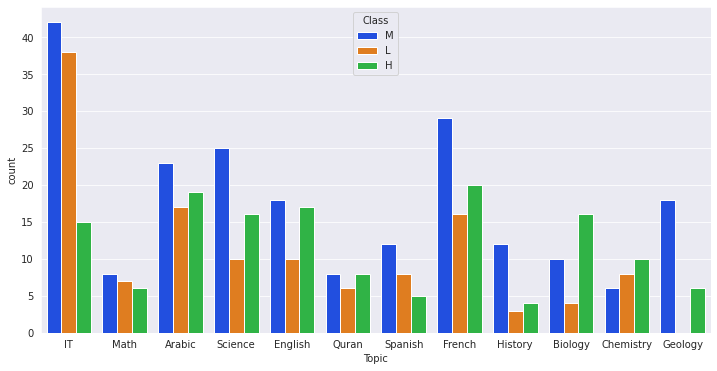

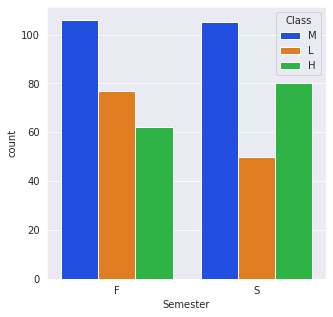

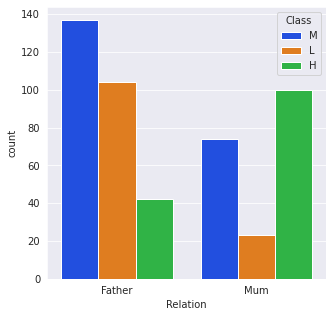

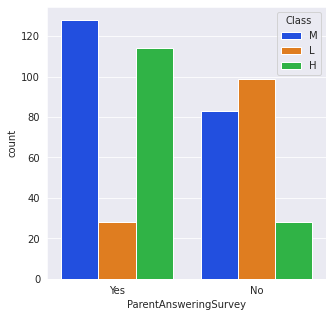

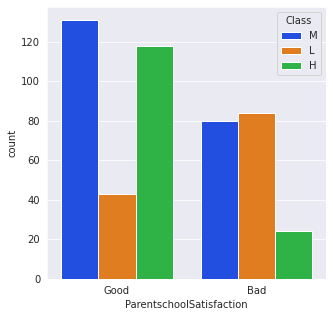

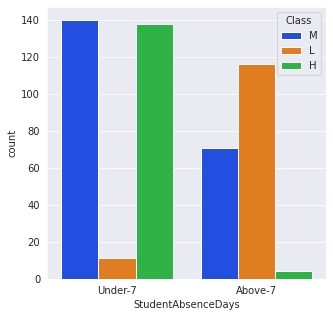

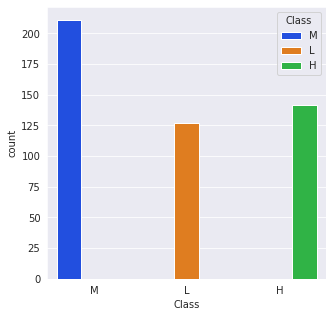

In [34]:
GetCountPlots_with_hue(df,obj_columns,'Class')

In [35]:
def GetBoxPlots(df,x_col):
    for col in int_columns:
        plt.figure(figsize=(5,5))
        boxplot1 = sns.boxplot(x=x_col, y=col, data=df)
        boxplot1 = sns.swarmplot(x=x_col, y=col, data=df, color=".15")
        plt.show() 

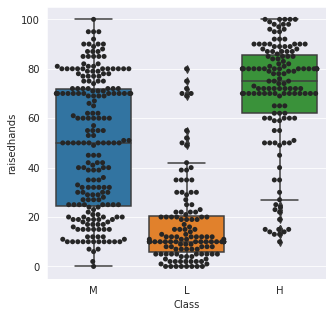

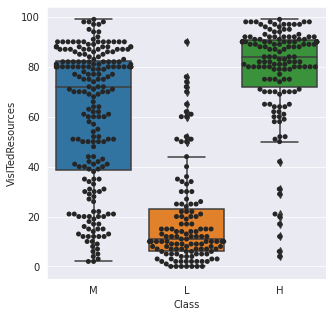

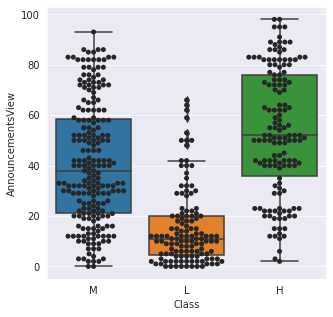

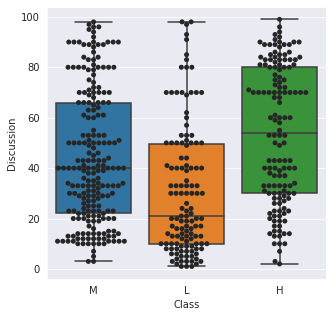

In [36]:
GetBoxPlots(df,'Class')

In [37]:


df['Failed'] = np.where(df['Class']=='L',1,0)



In [38]:


df['AbsBoolean'] = df['StudentAbsenceDays']
df['AbsBoolean'] = np.where(df['AbsBoolean'] == 'Under-7',0,1)
df['AbsBoolean'].groupby(df['Topic']).mean()



Topic
Arabic       0.389831
Biology      0.266667
Chemistry    0.500000
English      0.422222
French       0.323077
Geology      0.250000
History      0.473684
IT           0.473684
Math         0.476190
Quran        0.318182
Science      0.450980
Spanish      0.320000
Name: AbsBoolean, dtype: float64

In [39]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Failed,AbsBoolean
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [42]:
def NumaricVariablesDistributions(df):
    int_columns=df.columns[df.dtypes==int]
    plt.figure(figsize=(10,7))
    for i, column in enumerate(int_columns):
        plt.subplot(3,2, i+1)
        sns.distplot(df[column], label=column, bins=10, fit=norm)
        plt.ylabel('Density');

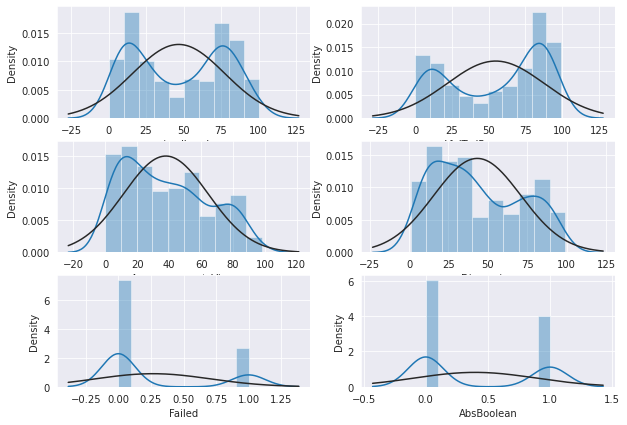

In [43]:
NumaricVariablesDistributions(df)

In [44]:
def ApplyBoxcoxTransformation(df,columns):
    plt.figure(figsize=(10,7))
    for i, column in enumerate(columns):
        plt.subplot(2,2, i+1)
        df[column]=boxcox1p(df[column], 0.3)
        sns.distplot(df[column], label=column, bins=10, fit=norm)
        plt.ylabel('Density')

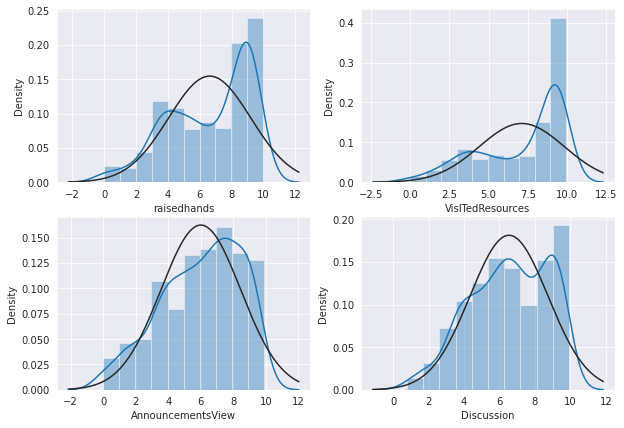

In [45]:
ApplyBoxcoxTransformation(df,['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'])

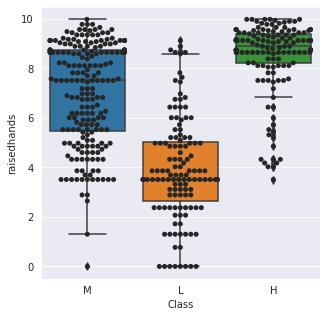

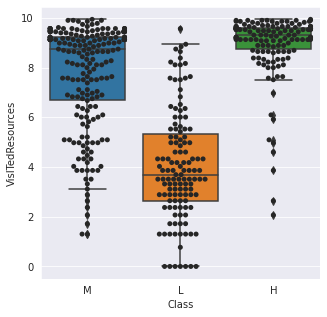

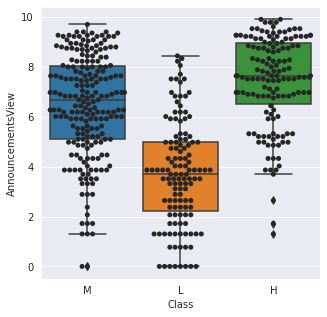

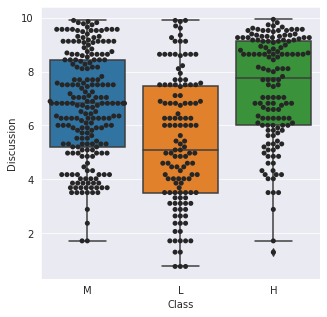

In [46]:
GetBoxPlots(df,'Class')



Let's look at correlation between these features:

    VisitedResources, RaisedHands and AnnouncementViews have medium correlation (0.5-0.7)



In [53]:
def LabelEncoding(df):
    for column in obj_columns:
        #Binarize and LabelEncode
        if ((df[column].value_counts().shape[0]==2) | (column=='StageID') | (column=='GradeID')):
            le=LabelEncoder().fit(df[column])
            df[column]=le.transform(df[column])

In [54]:
LabelEncoding(df)

In [55]:


df.head()



,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Failed,AbsBoolean
0,1,KW,KuwaIT,2,1,A,IT,0,0,4.324656,4.465209,1.301297,4.975586,1,1,1,M,0,0
1,1,KW,KuwaIT,2,1,A,IT,0,0,4.975586,4.975586,1.719055,5.525382,1,1,1,M,0,0
2,1,KW,KuwaIT,2,1,A,IT,0,0,3.510455,2.886887,0.000000,6.005384,0,0,0,L,1,1
3,1,KW,KuwaIT,2,1,A,IT,0,0,6.005384,5.525382,2.372566,6.433854,0,0,0,L,1,1
4,1,KW,KuwaIT,2,1,A,IT,0,0,6.822461,7.509675,3.862179,7.509675,0,0,0,M,0,1


In [56]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Failed', 'AbsBoolean'],
      dtype='object')

In [57]:
from sklearn.metrics import make_scorer, accuracy_score,roc_auc_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [65]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict 

In [64]:


def modelling(model,model_name):
    print(model)
    print("\n")
    model.fit(x_train, y_train)
    preds=model.predict(x_test)
    preds_proba=model.predict_proba(x_test)
    print('Accuracy = {}'.format(100*round(accuracy_score(y_test,preds),2)))
    print(classification_report(y_test, preds))
    
    print("\n")
    print(model_name)
    lr_roc_auc_multiclass = roc_auc_score_multiclass(y_test, preds)
    print("AUC Score for each lable")
    print(lr_roc_auc_multiclass)
    print("\n")
    plt.figure(figsize=(7,5))
    sns.heatmap(confusion_matrix(y_test,preds), annot=True, vmax=50)
    plt.show()

